In [6]:
import skrf as rf
import numpy as np
from skrf.media import DistributedCircuit,Coaxial
import matplotlib.pyplot as plt


>Q2.1: A transmission line has the following per-unit-length parameters: L = 0.5 μH/m, C = 200 pF/m,
R = 4.0 Ohm/m, and G = 0.02 S/m. Calculate the propagation constant and characteristic impedance
of this line at 800 MHz. If the line is 30 cm long, what is the attenuation in dB?

In [7]:
frequency1 = rf.Frequency(0.8, unit='ghz', npoints=1)
tl1 = DistributedCircuit(frequency=frequency1, z0=50, C=200e-12, L=0.5e-06, R=4.0, G=0.02)
line1 = tl1.line(30e-2,'m') # 30 cm length line 

print(f'propagation constant gamma {np.round(tl1.gamma,2)},\n\
      Characteristic impedance{np.round(tl1.Z0,2)} [Ohm],\n\
      loss at 800 MHz is {np.round(line1.s21.s_db[:,0,0],2)} [dB]')

propagation constant gamma [0.54+50.27j],
      Characteristic impedance[49.99+0.46j] [Ohm],
      loss at 800 MHz is [-1.41] [dB]


>Q2.3: RG-402U semirigid coaxial cable has an inner conductor diameter of 0.91 mm and a dielectric diameter of 3.02 mm. Both conductors are copper, and
the dielectric material is Teflon. Compute the R, L, G, and C parameters of this line at 1 GHz, and
use these results to find the characteristic impedance and attenuation of the line at 1 GHz. Compare your results to the manufacturer’s specifications of 50 Ohm and 0.43 dB/m, and discuss reasons for the difference.

In [8]:
frequency2 = rf.Frequency(1, unit='ghz', npoints=1)
coax1 = Coaxial(frequency=frequency2,Dint=0.91e-3, Dout=3.02e-3, epsilon_r=2.1, sigma=5.8e7) #tanD = 0
print(f'Characteristic impedance Z0 = {coax1.Z0} [Ohm] \n\
Attenuation{10*np.log(np.exp(-coax1.alpha))} [dB/m]')

Characteristic impedance Z0 = [49.63249219-0.06182456j] [Ohm] 
Attenuation[-0.37832421] [dB/m]


>Q2.4: Compute and plot the attenuation of the coaxial line of Problem 2.3, in dB/m, over a frequency range of 1 MHz to 100 GHz.

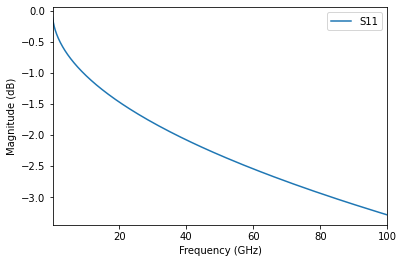

In [9]:
frequency3 = rf.Frequency(0.1,100,1001) #1 point at GHz
coax2 = Coaxial(frequency=frequency3,Dint=0.91e-3, Dout=3.02e-3, epsilon_r=2.1, sigma=5.8e7) #tanD = 0
coax2.line(1,unit='m',embed=True,z0 = 50).s21.plot_s_db()

>Q2.8: A lossless transmission line of electrical length l = 0.3λ is terminated with a complex load impedance Zl = 30 - j20 Ohm. Find the reflection coefficient at the load, the SWR on the line,
the reflection coefficient at the input of the line, and the input impedance to the line.

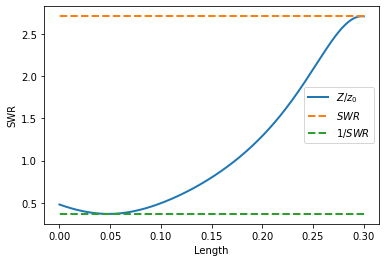

In [10]:
# load and line properties
freq = rf.Frequency(1,unit = 'ghz',npoints = 1)
wavelength = rf.c/freq.f  # 0.3 wavelength

Z_L,Z_0,L = [30 - 1j*20,75,0.3*wavelength]

# propagation constant
beta = freq.w/rf.c
gamma = 1j*beta

z = np.linspace(start=L, stop=0, num=301)
Zins = rf.zl_2_zin(Z_0, Z_L, gamma*z)
SWRs = rf.zl_2_swr(z0=Z_0, zl=rf.zl_2_zin(Z_0, Z_L, gamma*z))
fig, ax = plt.subplots()
ax.plot(z/wavelength, np.abs(Zins/Z_0), lw=2, label='$Z/z_0$')
ax.plot(z/wavelength, SWRs, lw=2, ls='--', label=r'$SWR$')
ax.plot(z/wavelength, 1/SWRs, lw=2, ls='--', label=r'$1/SWR$')
ax.set_xlabel('Length')
ax.set_ylabel('SWR')
ax.legend()